In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df_iris = pd.read_csv(url)

In [2]:
df_iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Entraîne ton modèle pour qu’il trouve 3 clusters à partir des 4 colonnes numériques.

X = df_iris.select_dtypes(include=['number'])

modelKM = KMeans(n_clusters=3)
modelKM.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

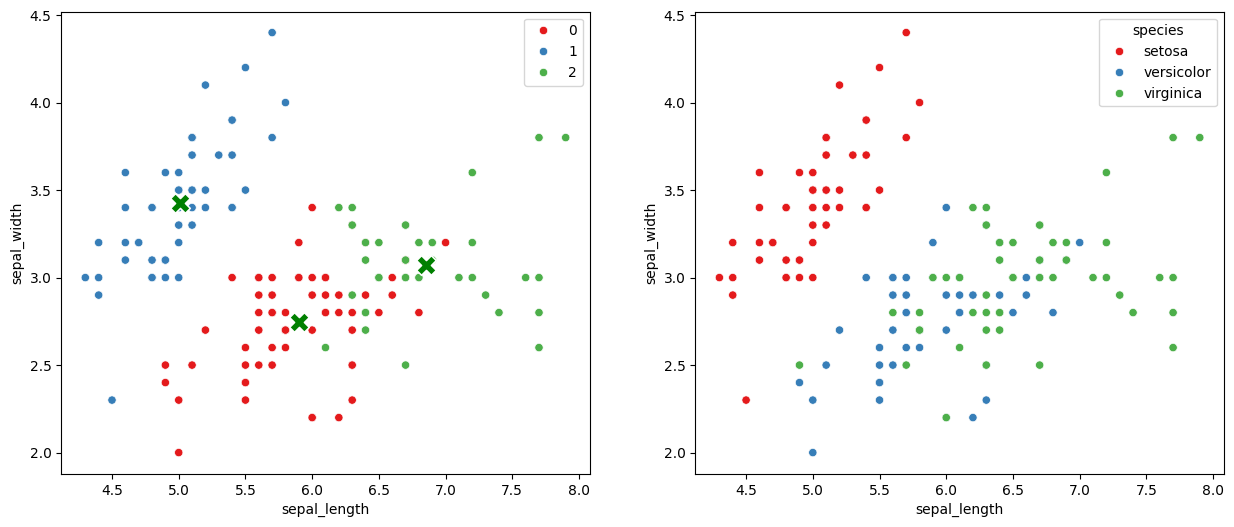

In [5]:
# Produis une visualisation comparant le dataset de base avec les classes générées par le K-means

df_iris['cluster'] = modelKM.predict(X)

# Seaborn
plt.figure(figsize=(15, 6))

# Graphique gauche - Clustering K-means
plt.subplot(1, 2, 1)
sns.scatterplot(x='sepal_length', y='sepal_width', hue='cluster', palette='Set1', data=df_iris, legend='full')
sns.scatterplot(x=modelKM.cluster_centers_[:, 0], y=modelKM.cluster_centers_[:, 1], marker='X', s=200, color='green')

# Graphique droite - Espèce d'Iris
plt.subplot(1, 2, 2)
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', palette='Set1', data=df_iris, legend='full')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


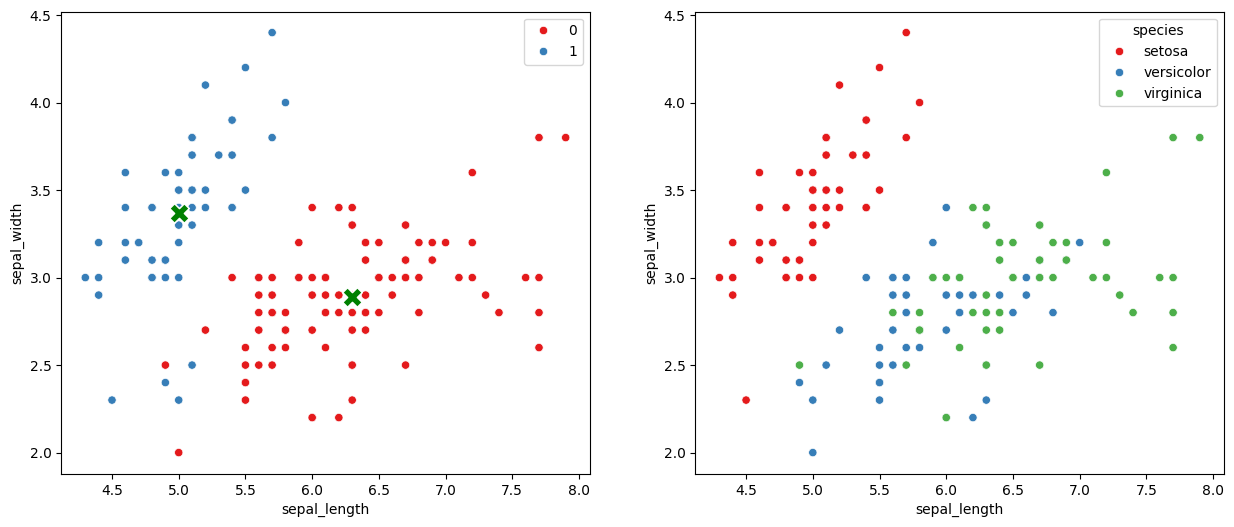

In [6]:
# Entraine un autre modèle sur 2 clusters, puis affiche les mêmes graphiques

X2 = df_iris.select_dtypes(include=['number'])

modelKM2 = KMeans(n_clusters=2)
modelKM2.fit(X2)

df_iris['cluster'] = modelKM2.predict(X2)

# Seaborn
plt.figure(figsize=(15, 6))

# Graphique gauche - Clustering K-means
plt.subplot(1, 2, 1)
sns.scatterplot(x='sepal_length', y='sepal_width', hue='cluster', palette='Set1', data=df_iris, legend='full')
sns.scatterplot(x=modelKM2.cluster_centers_[:, 0], y=modelKM2.cluster_centers_[:, 1], marker='X', s=200, color='green')

# Graphique droite - Espèce d'Iris
plt.subplot(1, 2, 2)
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', palette='Set1', data=df_iris, legend='full')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


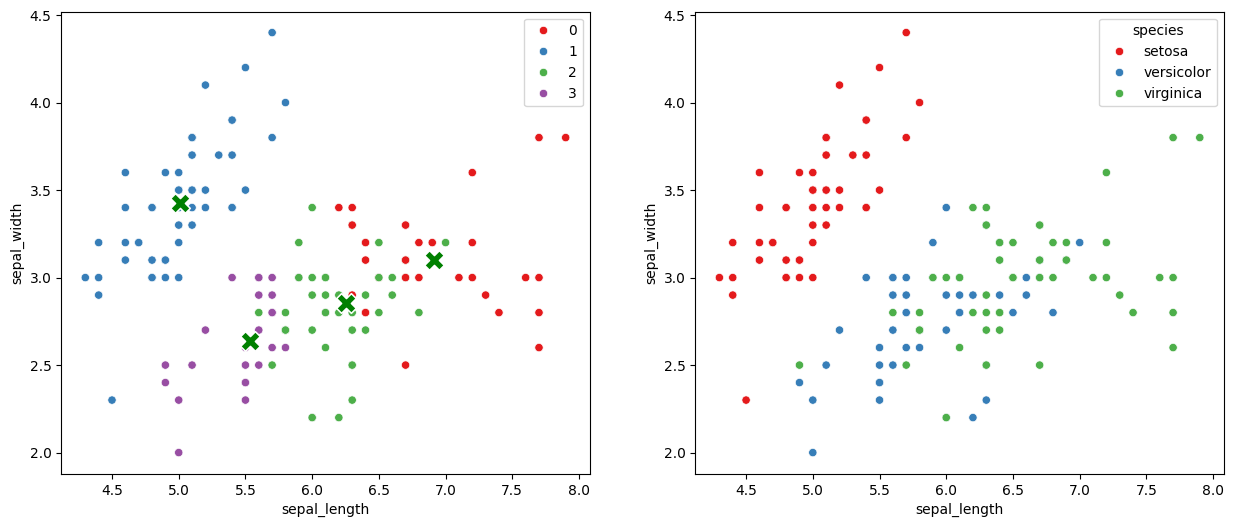

In [7]:
# Idem pour 4 clusters

X3 = df_iris.select_dtypes(include=['number'])

modelKM3 = KMeans(n_clusters=4)
modelKM3.fit(X3)

df_iris['cluster'] = modelKM3.predict(X3)

# Seaborn
plt.figure(figsize=(15, 6))

# Graphique gauche - Clustering K-means
plt.subplot(1, 2, 1)
sns.scatterplot(x='sepal_length', y='sepal_width', hue='cluster', palette='Set1', data=df_iris, legend='full')
sns.scatterplot(x=modelKM3.cluster_centers_[:, 0], y=modelKM3.cluster_centers_[:, 1], marker='X', s=200, color='green')

# Graphique droite - Espèce d'Iris
plt.subplot(1, 2, 2)
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', palette='Set1', data=df_iris, legend='full')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

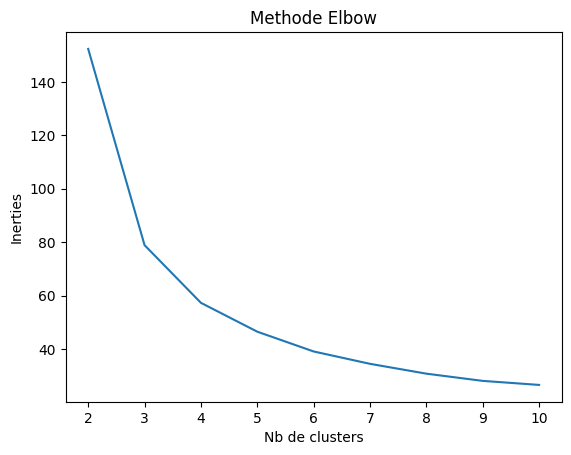

In [8]:
# Évalue ton modèle en utilisant la méthode Elbow, entre 2 et 10 clusters, quel nombre cluster semble optimal ? 4, mais ce n'est pas clair

inerties = []
K = range(2, 11)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    inerties.append(kmeanModel.inertia_)

plt.plot(K, inerties)
plt.xlabel('Nb de clusters')
plt.ylabel('Inerties')
plt.title('Methode Elbow')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

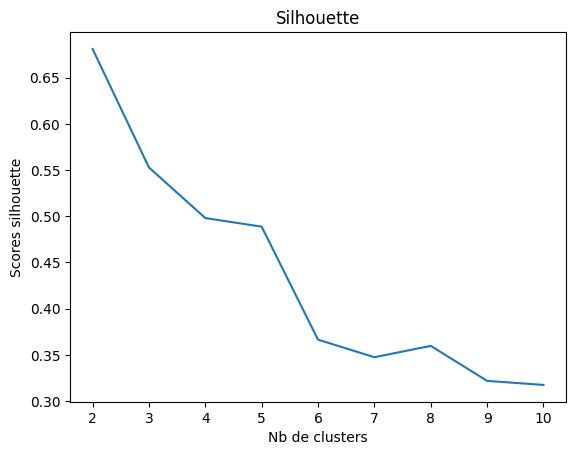

In [9]:
# Évalue ton modèle en utilisant la méthode Silhouette, entre 2 et 10 clusters, quel nombre de clusters semble optimal ? 2

from sklearn.metrics  import silhouette_score

K = range(2,11)
silhouette_scores = []

for k in K :
    modelKM = KMeans(n_clusters=k)
    modelKM.fit(X)
    score_silhouette = silhouette_score(X, modelKM.labels_)
    silhouette_scores.append(score_silhouette)

plt.plot(K, silhouette_scores)
plt.xlabel('Nb de clusters')
plt.ylabel('Scores silhouette')
plt.title('Silhouette')
plt.show()
